# Step1: Loading data

In [166]:
import xlrd

wb1 = xlrd.open_workbook(r'covid_data_0.xlsx')
sheets_name1 = wb1.sheet_names();
ws1 = wb1.sheet_by_index(0)
true_tweets = ws1.col_values(0)

wb2 = xlrd.open_workbook(r'covid_data_1.xlsx')
sheets_name2 = wb1.sheet_names();
ws2 = wb2.sheet_by_index(0)
misinfo_tweets = ws2.col_values(0)


In [167]:
len(misinfo_tweets)

211

NameError: name 'misinfo' is not defined

In [168]:
len(true_tweets)

314

# Step2: Tokenize

In [169]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mprit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [170]:
true_tweets_original = []
true_tweet_tokens = []
for i in range(len(true_tweets)):
    temp_split = nltk.word_tokenize(true_tweets[i])
    true_tweet_tokens.append(temp_split)
    true_tweets_original.append(true_tweets[i])

misinfo_tweets_original= []
misinfo_tweet_tokens = []
for i in range(len(misinfo_tweets)):
    temp_split = nltk.word_tokenize(misinfo_tweets[i])
    misinfo_tweet_tokens.append(temp_split)
    misinfo_tweets_original.append(misinfo_tweets[i])


# Step 3: Normalize Data

In [172]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence


In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mprit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mprit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [246]:
!pip install nltk

In [173]:
import pandas as pd

In [174]:
our_stop_words = ['....',
'...',
'around','covidー19',
'12','60','14','5','//t.c…', "'m","'re",'—','–','..','2', '20','4','//t.…','a…','b…','c…','f…','it…','no…','the…','covid_19',
'200,000','d…','is…','na','s…','t…','b','u','19.', 'https','1.7', '50',
'th…',
'3',
'19',
'100',
"'if",
'…','s',
't','y',
"''",
"'s",
'``',
"n't",
"'d",
'd',
'’',
'‘',
'”',
'“',
'”',
'“',
'covid19',
'covid-19',
'coronavirus',    
'corona',    
'a', # start of initial stop words
'able',
'about',
'across',
'after',
'all',
'almost',
'also',
'am',
'among',
'an',
'and',
'any',
'are',
'as',
'at',
'be',
'because',
'been',
'but',
'by',
'can',
'cannot',
'could',
'dear',
'did',
'do',
'does',
'either',
'else',
'ever',
'every',
'for',
'from',
'get',
'got',
'had',
'has',
'have',
'he',
'her',
'hers',
'him',
'his',
'how',
'however',
'i',
'if',
'in',
'into',
'is',
'it',
'its',
'just',
'least',
'let',
'like',
'likely',
'may',
'me',
'might',
'most',
'must',
'my',
'neither',
'no',
'nor',
'not',
'of',
'off',
'often',
'on',
'only',
'or',
'other','our','own','rather','said','say','says','she','should','since','so','some','than','that','the','their','them','then',
'there','these','they','this','tis','to','too','twas','us','wants','was','we','were','what','when','where','which','while','who','whom',
'why','will','with','would','yet','you','your', '🙄', "'ve",'@','rt','http','"']

In [175]:
len(our_stop_words)
# initial size 125

188

# Step 4: Remove noise, stop words

In [176]:
import re, string

def remove_noise(tweet_tokens, stop_words):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#:/]|[!*\(\),]|..."😷RT'\
                       'http(?:%[0-9a-fA-F][0-9a-fA-F]))+"..."😷RT','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens


In [177]:
true_cleaned_tokens_list = []
misinfo_cleaned_tokens_list = []

for tokens in true_tweet_tokens:
    true_cleaned_tokens_list.append(remove_noise(tokens, our_stop_words))

for tokens in misinfo_tweet_tokens:
    misinfo_cleaned_tokens_list.append(remove_noise(tokens, our_stop_words))


In [178]:
# getting tokens
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token


In [179]:
all_true_tweet_words = get_all_words(true_cleaned_tokens_list)
all_misinfo_tweet_words = get_all_words(misinfo_cleaned_tokens_list)


In [180]:
from nltk import FreqDist

freq_dist_true_tweet = FreqDist(all_true_tweet_words)
freq_dist_misinfo_tweet = FreqDist(all_misinfo_tweet_words)


In [181]:
print(freq_dist_true_tweet.most_common(50))



[('mask', 74), ('virus', 71), ('stay', 66), ('lockdown', 59), ('home', 52), ('wear', 44), ('health', 39), ('vaccine', 33), ('people', 33), ('supportlockdownstaysafe', 31), ('spread', 31), ('covid', 29), ('test', 26), ('please', 25), ('social', 24), ('more', 23), ('pandemic', 21), ('distancing', 20), ('fight', 20), ('amp', 20), ('go', 19), ('safe', 18), ('stop', 17), ('good', 17), ('one', 16), ('person', 16), ('now', 16), ('patient', 16), ('case', 15), ('against', 15), ('life', 15), ('very', 15), ('public', 15), ('still', 15), ('new', 15), ('follow', 14), ('hand', 14), ('use', 14), ('healthy', 14), ('protect', 13), ('time', 13), ('india', 12), ('infection', 12), ('take', 12), ('way', 11), ('make', 11), ('infect', 11), ('disease', 11), ('drug', 11), ('antibody', 10)]


In [182]:
print(freq_dist_misinfo_tweet.most_common(50))


[('test', 40), ('virus', 34), ('covid', 32), ('hydroxychloroquine', 32), ('mask', 29), ('use', 29), ('drug', 27), ('now', 27), ('trump', 23), ('vaccine', 23), ('case', 22), ('emergency', 21), ('stop', 19), ('fda', 18), ('very', 17), ('wear', 17), ('people', 17), ('health', 17), ('5g', 16), ('right', 16), ('few', 15), ('amp', 13), ('one', 12), ('make', 12), ('treat', 12), ('patient', 12), ('lockdown', 11), ('treatment', 11), ('authorization', 11), ('new', 11), ('up', 10), ('immunity', 10), ('good', 10), ('revoke', 10), ('more', 10), ('stay', 9), ('need', 9), ('go', 9), ('see', 9), ('take', 9), ('actually', 8), ('doctor', 8), ('social', 8), ('pandemic', 8), ('time', 8), ('flu', 8), ('chloroquine', 8), ('against', 8), ('malaria', 8), ('rate', 8)]


# step 6

In [185]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)



In [186]:
true_tweet_tokens_for_model = get_tweets_for_model(true_cleaned_tokens_list)
misinfo_tweets_tokens_for_model = get_tweets_for_model(misinfo_cleaned_tokens_list)

import random

true_tweet_dataset = [(tweet_dict, "0")
                     for tweet_dict in true_tweet_tokens_for_model]

misinfo_tweet_dataset = [(tweet_dict, "1")
                     for tweet_dict in misinfo_tweets_tokens_for_model]

#Merge_dataset = true_tweet_dataset + misinfo_tweet_dataset


#random.shuffle(Merge_dataset)

#train_data2 = dataset


In [189]:
true_tweet_df = pd.DataFrame(true_tweet_dataset, columns=['tokens', 'Label'])

In [190]:
misinfo_tweet_df = pd.DataFrame(misinfo_tweet_dataset, columns=['tokens', 'Label'])

In [191]:
true_tweet_df.head(4)

,tokens,Label
0,"{'india': True, 'potentially': True, 'large': ...",0
1,"{'scientist': True, 'medical': True, 'research...",0
2,"{'save': True, 'urself': True, 'whole': True, ...",0
3,"{'follow': True, 'social': True, 'distancing':...",0


In [192]:
true_tweet_df['Text'] = true_tweets_original

In [193]:
misinfo_tweet_df['Text'] = misinfo_tweets_original

In [194]:
misinfo_tweet_df.head(4)

,tokens,Label,Text
0,"{'test': True, 'virus': True, 'pick': True, 'u...",1,if the test for corona virus is picking up exo...
1,"{'nigga': True, 'cause': True, '5g': True, 'ne...",1,niggas said corona is caused from 5g network r...
2,"{'donald': True, 'trump': True, 'approve': Tru...",1,donald trump approved 5g so he is just as evil...
3,"{'something': True, 'abt': True, 'government':...",1,they saying something abt the government insta...


In [195]:
merge_tweets_data = pd.concat([true_tweet_df, misinfo_tweet_df])

In [196]:
merge_tweets_data.shape

(525, 3)

In [199]:
merge_tweets_data = sklearn.utils.shuffle(merge_tweets_data)

In [200]:
merge_tweets_data.head(5)

,tokens,Label,Text
15,"{'two': True, 'oxford': True, 'professor': Tru...",1,two oxford professors and one at dundee have s...
169,"{'read': True, 'fake': True, 'news': True, 'wh...",1,read that some fake news whatsapp forward talk...
133,"{'still': True, 'fight': True, 'pandemic': Tru...",0,we are still fighting a pandemic. and covid-19...
168,"{'everyone': True, 'flu': True, 'shot': True, ...",1,everyone that had a flu shot will test positiv...
131,"{'immunity': True, 'important': True, 'fight':...",0,immunity is important in the fight against cor...


In [205]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

merge_tweets_data['Text_Clean'] = merge_tweets_data['Text'].apply(lambda x: remove_punct(x))

<ipython-input-205-05fb8173106e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_tweets_data['Text_Clean'] = merge_tweets_data['Text'].apply(lambda x: remove_punct(x))


In [264]:
merge_tweets_data.head(5)

,tokens,Label,Text,Text_Clean,Text_Final,true_label,misinfo_label
15,"{'two': True, 'oxford': True, 'professor': Tru...",1,two oxford professors and one at dundee have s...,two oxford professors and one at dundee have s...,two oxford professors one dundee scientific ev...,0,1
169,"{'read': True, 'fake': True, 'news': True, 'wh...",1,read that some fake news whatsapp forward talk...,read that some fake news whatsapp forward talk...,read fake news whatsapp forward talks drinking...,0,1
133,"{'still': True, 'fight': True, 'pandemic': Tru...",0,we are still fighting a pandemic. and covid-19...,we are still fighting a pandemic and covid19 i...,still fighting pandemic fighting back 🚨 practi...,1,0
168,"{'everyone': True, 'flu': True, 'shot': True, ...",1,everyone that had a flu shot will test positiv...,everyone that had a flu shot will test positiv...,everyone flu shot test positive virusjust sayi...,0,1
131,"{'immunity': True, 'important': True, 'fight':...",0,immunity is important in the fight against cor...,immunity is important in the fight against cor...,immunity important fight against ayurveda comp...,1,0


In [ ]:
# preprocessing for true / misinfo label creation 

In [249]:
merge_tweets_data['Label'] = merge_tweets_data['Label'].astype(int)

In [250]:

true_label = []
misinfo_label = []
for l in merge_tweets_data.Label:
    if l == 0:
        true_label.append(1)
        misinfo_label.append(0)
    elif l == 1:
        true_label.append(0)
        misinfo_label.append(1)

In [251]:

merge_tweets_data['true_label']= true_label
merge_tweets_data['misinfo_label']= misinfo_label

In [217]:

from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in merge_tweets_data.Text_Clean]

In [218]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [219]:

def remove_stop_words(tokens): 
    return [word for word in tokens if word not in our_stop_words]

In [210]:
#from nltk import word_tokenize, WordNetLemmatizer
#tokens = [word_tokenize(sen) for sen in merge_tweets_data.Text_Clean]

In [220]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]

In [213]:
len(filtered_words)

12

In [221]:
result = [' '.join(sen) for sen in filtered_words]

In [222]:
merge_tweets_data['Text_Final'] = result

<ipython-input-222-83b2d4933e1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_tweets_data['Text_Final'] = result


# Training Testing split

In [265]:
data_train, data_test = train_test_split(merge_tweets_data, test_size=0.20, random_state=42)

In [266]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

5376 words total, with a vocabulary size of 2289
Max sentence length is 33


In [267]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

1341 words total, with a vocabulary size of 820
Max sentence length is 28


In [228]:
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [269]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

# get embeddings

In [270]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [271]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

# tokenizing and padding sequence

In [272]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 2580 unique tokens.


In [273]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [274]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(2581, 300)


In [275]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# define CNN

In [276]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model


In [245]:
#merge_tweets_data['true_label'] = merge_tweets_data['true_label'].astype(int)

In [246]:
#merge_tweets_data['misinfo_label'] = merge_tweets_data['misinfo_label'].astype(int)

In [277]:
label_names = ['true_label', 'misinfo_label'] 

In [278]:
y_train = data_train[label_names].values

In [279]:

x_train = train_cnn_data
y_tr = y_train

In [300]:
model_cnn = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 300)      774300      input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 49, 200)      120200      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 48, 200)      180200      embedding_2[0][0]                
_______________________________________________________________________________________

# Train CNN

In [301]:
num_epochs = 3
batch_size = 34

In [302]:
hist_cnn = model_cnn.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
12/12 [==============================] - 1s 48ms/step - loss: 0.7700 - acc: 0.5794 - val_loss: 0.6777 - val_acc: 0.6667
Epoch 2/3
12/12 [==============================] - 0s 34ms/step - loss: 0.5718 - acc: 0.7249 - val_loss: 0.6634 - val_acc: 0.6667
Epoch 3/3
12/12 [==============================] - 0s 39ms/step - loss: 0.4606 - acc: 0.8228 - val_loss: 0.5845 - val_acc: 0.6667


# Test CNN

In [303]:
predictions_cnn = model_cnn.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 993us/step


In [304]:

labels = [0, 1]

In [305]:
prediction_labels=[]
for p in predictions_cnn:
    prediction_labels.append(labels[np.argmax(p)])

In [306]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.638095238095238

In [308]:
data_test.Label.value_counts()

0    56
1    49
Name: Label, dtype: int64

# RNN/LSTM

In [309]:
def recurrent_nn(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

#     lstm = LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embedded_sequences)
    lstm = LSTM(256)(embedded_sequences)
    
    x = Dense(128, activation='relu')(lstm)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [310]:

model_rnn = recurrent_nn(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 50, 300)           774300    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 1,377,822
Trainable params: 603,522
Non-trainable params: 774,300
________________________________________

# Train LSTM

In [311]:

num_epochs = 5
batch_size = 34

In [312]:
hist = model_rnn.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/5
12/12 [==============================] - 1s 122ms/step - loss: 0.6687 - acc: 0.5899 - val_loss: 0.6743 - val_acc: 0.7143
Epoch 2/5
12/12 [==============================] - 1s 84ms/step - loss: 0.6558 - acc: 0.6402 - val_loss: 0.6628 - val_acc: 0.5952
Epoch 3/5
12/12 [==============================] - 1s 81ms/step - loss: 0.5966 - acc: 0.7196 - val_loss: 0.7178 - val_acc: 0.6190
Epoch 4/5
12/12 [==============================] - 1s 92ms/step - loss: 0.5744 - acc: 0.7275 - val_loss: 0.6281 - val_acc: 0.6667
Epoch 5/5
12/12 [==============================] - 1s 86ms/step - loss: 0.5057 - acc: 0.7381 - val_loss: 0.5644 - val_acc: 0.7857


# Test LSTM

In [313]:
predictions_lstm = model_rnn.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 1ms/step


In [314]:
labels = [0, 1]

In [315]:
prediction_labels=[]
for p in predictions_lstm:
    prediction_labels.append(labels[np.argmax(p)])

In [316]:

sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.6476190476190476

In [25]:
true_tweet_dataset[1]

({'scientist': True,
  'medical': True,
  'researcher': True,
  'work': True,
  'find': True,
  'vaccine': True,
  'against': True,
  'virus': True,
  'until': True,
  'stop': True},
 '0')

In [26]:
len(true_tweet_dataset)

314

In [112]:

train_data = Merge_dataset[:421]
test_data = Merge_dataset[422:]


In [115]:
training_df = pd.DataFrame(train_data, columns=['Text', 'Label'])

In [116]:
training_df.head(4)

,Text,Label
0,"{'greaternoidawest': True, 'coronavirusindia':...",0
1,"{'worldwide': True, 'pandemic': True, 'cause':...",0
2,"{'follow': True, 'social': True, 'distancing':...",0
3,"{'roque': True, 'implementation': True, 'lockd...",0


In [123]:
sklearn.utils.shuffle(training_df)

,Text,Label
329,"{'37': True, 'virus-infected': True, 'patient'...",0
179,"{'one': True, 'nova': True, 'health': True, 'c...",0
174,"{'pandemic': True, 'teach': True, 'everyone': ...",0
402,"{'wear': True, 'mask': True, 'please': True}",0
286,"{'two': True, 'oxford': True, 'professor': Tru...",1
...,...,...
17,"{'number': True, 'japanese': True, 'antibody':...",0
178,"{'case': True, 'rise': True, 'rapidly': True, ...",0
189,"{'social': True, 'distance': True, 'very': Tru...",0
4,"{'hydroxychloroquin': True, 'approve': True, '...",1


In [124]:
testing_df = pd.DataFrame(test_data, columns=['Text', 'Label'])

In [125]:
testing_df.head(4)

,Text,Label
0,"{'support': True, 'lockdown': True, 'stop': Tr...",0
1,"{'early': True, 'detection': True, 'monitoring...",0
2,"{'federal': True, 'law': True, 'allow': True, ...",1
3,"{'😷': True, 'friend': True, 'buy': True, 'mask...",0


In [126]:
testing_df.shape

(103, 2)

In [128]:
training_df.shape

(421, 2)

In [130]:
merge_data = pd.concat([testing_df, training_df])

In [139]:
merge_data.shape

(524, 2)

In [132]:
merge_data.head(5)

,Text,Label
0,"{'support': True, 'lockdown': True, 'stop': Tr...",0
1,"{'early': True, 'detection': True, 'monitoring...",0
2,"{'federal': True, 'law': True, 'allow': True, ...",1
3,"{'😷': True, 'friend': True, 'buy': True, 'mask...",0
4,"{'stay': True, 'home': True, 'unique': True, '...",0


In [141]:
merge_data.Label.unique()

array(['0', '1'], dtype=object)

In [142]:
true = []
misinfo = []
for l in merge_data.Label:
    if l == '0':
        #print("it went in if")
        true.append(1)
        misinfo.append(0)
    elif l == '1':
        true.append(0)
        misinfo.append(1)

In [144]:
len(misinfo)

524

In [150]:
sklearn.utils.shuffle(merge_data)

,Text,Label,tru,mis
21,"{'scientist': True, 'face': True, 'mask': True...",1,0,1
293,"{'view': True, 'increase': True, 'status': Tru...",0,1,0
10,"{'woman': True, '15': True, 'friend': True, 't...",0,1,0
400,"{'bayer': True, 'offer': True, 'anti': True, '...",1,0,1
85,"{'friend': True, 'india': True, 'win': True, '...",1,0,1
...,...,...,...,...
367,"{'lockdown': True, 'give': True, 'high': True,...",0,1,0
0,"{'support': True, 'lockdown': True, 'stop': Tr...",0,1,0
336,"{'korean': True, 'study': True, 'sars-cov-2': ...",0,1,0
17,"{'even': True, 'need': True, 'hydroxychlorquin...",1,0,1


In [145]:
merge_data['tru']= true
merge_data['mis']= misinfo

In [146]:
merge_data.head(5)

,Text,Label,tru,mis
0,"{'support': True, 'lockdown': True, 'stop': Tr...",0,1,0
1,"{'early': True, 'detection': True, 'monitoring...",0,1,0
2,"{'federal': True, 'law': True, 'allow': True, ...",1,0,1
3,"{'😷': True, 'friend': True, 'buy': True, 'mask...",0,1,0
4,"{'stay': True, 'home': True, 'unique': True, '...",0,1,0


In [148]:
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [159]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['Text'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [151]:
data_train, data_test = train_test_split(merge_data, test_size=0.20, random_state=42)

In [152]:
all_training_words = [word for tokens in data_train["Text"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["Text"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

5435 words total, with a vocabulary size of 2359
Max sentence length is 33


In [157]:
all_test_words = [word for tokens in data_test["Text"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["Text"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

1273 words total, with a vocabulary size of 772
Max sentence length is 30


# get embeddings

In [160]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [161]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [163]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), char_level=False)
tokenizer.fit_on_texts(data_train["Text"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

AttributeError: 'dict' object has no attribute 'lower'

In [44]:
len(misinfo_tweet_dataset)

211

In [45]:
len(true_tweet_dataset)

314

In [46]:
len(Merge_dataset)

525

In [47]:
Merge_dataset[13]

({'potent': True,
  'neutralize': True,
  'antibody': True,
  'against': True,
  'sars-cov-2': True,
  'identify': True,
  'high-throughput': True,
  'single-cell': True,
  'sequencing': True,
  'convalescent': True,
  'patient': True,
  'cell': True,
  '//t.co/tqhetaqr80': True},
 '0')

# Step 7:Classifiers with NLTK

In [32]:
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk import DecisionTreeClassifier
from nltk import MaxentClassifier

In [52]:
classifier = NaiveBayesClassifier.train(train_data)

In [48]:
classifier2 = DecisionTreeClassifier.train(train_data)

In [58]:
classifier_mxnet = MaxentClassifier.train(train_data)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.404
             2          -0.43919        0.929
             3          -0.33655        0.955
             4          -0.27652        0.971
             5          -0.23600        0.974
             6          -0.20643        0.988
             7          -0.18375        0.990
             8          -0.16574        0.993
             9          -0.15106        0.993
            10          -0.13884        0.993
            11          -0.12851        0.995
            12          -0.11965        0.995
            13          -0.11197        0.995
            14          -0.10524        0.995
            15          -0.09930        0.995
            16          -0.09402        0.995
            17          -0.08928        0.995
            18          -0.08502        0.995
            19          -0.08115        0.995
 

In [53]:
print("Accuracy is:", classify.accuracy(classifier, test_data)*100)

Accuracy is: 73.7864077669903


In [49]:
print("Accuracy is:", classify.accuracy(classifier2, test_data)*100)

Accuracy is: 67.96116504854369


In [59]:
print("Accuracy is:", classify.accuracy(classifier_mxnet, test_data)*100)

Accuracy is: 68.93203883495146


In [35]:
from nltk.metrics.scores import *

In [36]:
import collections

In [54]:
# for calculating precision adn recall creating refset and testsets
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

In [55]:
# metrics for NB classifiers (bag of words)
print( 'True info Precision:', precision(refsets['0'], testsets['0']))
print( 'Misinfo Precision:', precision(refsets['1'], testsets['1']))
print( 'True info Recall:', recall(refsets['0'], testsets['0']))
print( 'Misinfo Recall:', recall(refsets['1'], testsets['1']) )
print( 'True info F-measure:', f_measure(refsets['0'], testsets['0']))
print( 'Misinfo F-measure:', f_measure(refsets['1'], testsets['1']) )


True info Precision: 0.7966101694915254
Misinfo Precision: 0.6590909090909091
True info Recall: 0.7580645161290323
Misinfo Recall: 0.7073170731707317
True info F-measure: 0.7768595041322315
Misinfo F-measure: 0.6823529411764705


In [56]:
# for calculating precision adn recall creating refset and testsets
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets[label].add(i)
    observed = classifier2.classify(feats)
    testsets[observed].add(i)

In [57]:
# metrics for NB classifiers (bag of words)
print( 'True info Precision:', precision(refsets['0'], testsets['0']))
print( 'Misinfo Precision:', precision(refsets['1'], testsets['1']))
print( 'True info Recall:', recall(refsets['0'], testsets['0']))
print( 'Misinfo Recall:', recall(refsets['1'], testsets['1']) )
print( 'True info F-measure:', f_measure(refsets['0'], testsets['0']))
print( 'Misinfo F-measure:', f_measure(refsets['1'], testsets['1']) )


True info Precision: 0.7301587301587301
Misinfo Precision: 0.6
True info Recall: 0.7419354838709677
Misinfo Recall: 0.5853658536585366
True info F-measure: 0.736
Misinfo F-measure: 0.5925925925925926


In [60]:
# for calculating precision adn recall creating refset and testsets
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets[label].add(i)
    observed = classifier_mxnet.classify(feats)
    testsets[observed].add(i)

In [61]:
# metrics for NB classifiers (bag of words)
print( 'True info Precision:', precision(refsets['0'], testsets['0']))
print( 'Misinfo Precision:', precision(refsets['1'], testsets['1']))
print( 'True info Recall:', recall(refsets['0'], testsets['0']))
print( 'Misinfo Recall:', recall(refsets['1'], testsets['1']) )
print( 'True info F-measure:', f_measure(refsets['0'], testsets['0']))
print( 'Misinfo F-measure:', f_measure(refsets['1'], testsets['1']) )


True info Precision: 0.7142857142857143
Misinfo Precision: 0.6363636363636364
True info Recall: 0.8064516129032258
Misinfo Recall: 0.5121951219512195
True info F-measure: 0.7575757575757577
Misinfo F-measure: 0.5675675675675675


In [77]:
import sklearn
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [78]:
classifier_svm = SklearnClassifier(SVC()).train(train_data)

In [79]:
print("Accuracy is:", classify.accuracy(classifier_svm, test_data)*100)

Accuracy is: 68.93203883495146


In [80]:
classifier_rf = SklearnClassifier(RandomForestClassifier()).train(train_data)

In [81]:
print("Accuracy is:", classify.accuracy(classifier_rf, test_data)*100)

Accuracy is: 67.96116504854369


In [82]:
# for calculating precision adn recall creating refset and testsets
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets[label].add(i)
    observed = classifier_svm.classify(feats)
    testsets[observed].add(i)

In [83]:
# metrics for NB classifiers (bag of words)
print( 'True info Precision:', precision(refsets['0'], testsets['0']))
print( 'Misinfo Precision:', precision(refsets['1'], testsets['1']))
print( 'True info Recall:', recall(refsets['0'], testsets['0']))
print( 'Misinfo Recall:', recall(refsets['1'], testsets['1']) )
print( 'True info F-measure:', f_measure(refsets['0'], testsets['0']))
print( 'Misinfo F-measure:', f_measure(refsets['1'], testsets['1']) )


True info Precision: 0.6785714285714286
Misinfo Precision: 0.7368421052631579
True info Recall: 0.9193548387096774
Misinfo Recall: 0.34146341463414637
True info F-measure: 0.7808219178082192
Misinfo F-measure: 0.4666666666666667


In [84]:
# for calculating precision adn recall creating refset and testsets
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets[label].add(i)
    observed = classifier_rf.classify(feats)
    testsets[observed].add(i)

In [85]:
# metrics for NB classifiers (bag of words)
print( 'True info Precision:', precision(refsets['0'], testsets['0']))
print( 'Misinfo Precision:', precision(refsets['1'], testsets['1']))
print( 'True info Recall:', recall(refsets['0'], testsets['0']))
print( 'Misinfo Recall:', recall(refsets['1'], testsets['1']) )
print( 'True info F-measure:', f_measure(refsets['0'], testsets['0']))
print( 'Misinfo F-measure:', f_measure(refsets['1'], testsets['1']) )


True info Precision: 0.6746987951807228
Misinfo Precision: 0.7
True info Recall: 0.9032258064516129
Misinfo Recall: 0.34146341463414637
True info F-measure: 0.7724137931034483
Misinfo F-measure: 0.459016393442623


In [344]:
print(classifier.show_most_informative_features(100))

Most Informative Features
      hydroxychloroquine = True                1 : 0      =     13.6 : 1.0
                   right = True                1 : 0      =     13.0 : 1.0
                     fda = True                1 : 0      =     12.0 : 1.0
                      5g = True                1 : 0      =     11.1 : 1.0
                     few = True                1 : 0      =     11.1 : 1.0
                   treat = True                1 : 0      =     10.1 : 1.0
                    home = True                0 : 1      =      9.0 : 1.0
           authorization = True                1 : 0      =      8.2 : 1.0
                    safe = True                0 : 1      =      8.1 : 1.0
               emergency = True                1 : 0      =      5.6 : 1.0
                   india = True                0 : 1      =      5.3 : 1.0
                actually = True                1 : 0      =      5.3 : 1.0
                   drink = True                1 : 0      =      5.3 : 1.0

# Ngrams methods

In [86]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

In [87]:
def create_ngram_features(words, n=2):
    ngram_vocab = ngrams(words, n)
    my_dict = dict([(ng, True) for ng in ngram_vocab])
    return my_dict

In [393]:
for n in [1,2,3,4,5]:
    pos_data = []
    for fileid in movie_reviews.fileids('pos'):
        words = movie_reviews.words(fileid)
        pos_data.append((create_ngram_features(words, n), "positive"))    

    neg_data = []
    for fileid in movie_reviews.fileids('neg'):
        words = movie_reviews.words(fileid)
        neg_data.append((create_ngram_features(words, n), "negative")) 

    train_set = pos_data[:800] + neg_data[:800]
    test_set =  pos_data[800:] + neg_data[800:]

    classifier = NaiveBayesClassifier.train(train_set)

    accuracy = nltk.classify.util.accuracy(classifier, test_set)
    print(str(n)+'-gram accuracy:', accuracy)

1-gram accuracy: 0.735
2-gram accuracy: 0.7625
3-gram accuracy: 0.8275
4-gram accuracy: 0.8125
5-gram accuracy: 0.74


In [88]:
true_tweet_dataset[i][1]

'0'

In [89]:
for n in [1,2,3]:
    trueinfo_data = []
    for i in range(len(true_tweet_dataset)):
        words = true_tweet_dataset[i][0]
        trueinfo_data.append((create_ngram_features(words, n), "0"))    

    misinfo_data = []
    for i in range(len(misinfo_tweet_dataset)):
        words = misinfo_tweet_dataset[i][0]
        misinfo_data.append((create_ngram_features(words, n), "1")) 
    trueinfo_data = random.sample(trueinfo_data, 250)
    misinfo_data = random.sample(misinfo_data, 200)
    Merge_data = trueinfo_data + misinfo_data
    print(str(n)+'-gram size of total data ',len(Merge_data))
    random.shuffle(Merge_data)
    
    train_set = Merge_data[:360]
    test_set =  Merge_data[360:]
    print(str(n)+'-gram size of training data ',len(train_set))
    print(str(n)+'-gram size of test data ', len(test_set))
    classifier_nb = NaiveBayesClassifier.train(train_set)

    accuracy_nb = nltk.classify.util.accuracy(classifier_nb, test_set)
    print(str(n)+'-gram accuracy for NB:', accuracy_nb)
    refsets_ngram = collections.defaultdict(set)
    testsets_ngram = collections.defaultdict(set)

    for i, (feats, label) in enumerate(test_set):
        refsets_ngram[label].add(i)
        observed = classifier_nb.classify(feats)
        testsets_ngram[observed].add(i)
    print( 'True info Precision:', precision(refsets_ngram['0'], testsets_ngram['0']))
    print( 'Misinfo Precision:', precision(refsets_ngram['1'], testsets_ngram['1']))
    print( 'True info Recall:', recall(refsets_ngram['0'], testsets_ngram['0']))
    print( 'Misinfo Recall:', recall(refsets_ngram['1'], testsets_ngram['1']) )
    print( 'True info F-measure:', f_measure(refsets_ngram['0'], testsets_ngram['0']))
    print( 'Misinfo F-measure:', f_measure(refsets_ngram['1'], testsets_ngram['1']) )
    
    #decision tree
    classifier_dt = DecisionTreeClassifier.train(train_set)

    accuracy_dt = nltk.classify.util.accuracy(classifier_dt, test_set)
    print(str(n)+'-gram accuracy for DT:', accuracy_dt)
    
    refsets_ngram_dt = collections.defaultdict(set)
    testsets_ngram_dt = collections.defaultdict(set)
    
    for i, (feats, label) in enumerate(test_set):
        refsets_ngram_dt[label].add(i)
        observed = classifier_dt.classify(feats)
        testsets_ngram_dt[observed].add(i)
    
    print( 'True info Precision:', precision(refsets_ngram_dt['0'], testsets_ngram_dt['0']))
    print( 'Misinfo Precision:', precision(refsets_ngram_dt['1'], testsets_ngram_dt['1']))
    print( 'True info Recall:', recall(refsets_ngram_dt['0'], testsets_ngram_dt['0']))
    print( 'Misinfo Recall:', recall(refsets_ngram_dt['1'], testsets_ngram_dt['1']) )
    print( 'True info F-measure:', f_measure(refsets_ngram_dt['0'], testsets_ngram_dt['0']))
    print( 'Misinfo F-measure:', f_measure(refsets_ngram_dt['1'], testsets_ngram_dt['1']) )
    
    #MXnet
    classifier_mxn = MaxentClassifier.train(train_set)

    accuracy_mxn = nltk.classify.util.accuracy(classifier_mxn, test_set)
    print(str(n)+'-gram accuracy for MXNet:', accuracy_mxn)
    
    refsets_ngram_mxn = collections.defaultdict(set)
    testsets_ngram_mxn = collections.defaultdict(set)
    
    for i, (feats, label) in enumerate(test_set):
        refsets_ngram_mxn[label].add(i)
        observed = classifier_mxn.classify(feats)
        testsets_ngram_mxn[observed].add(i)
    
    print( 'True info Precision:', precision(refsets_ngram_mxn['0'], testsets_ngram_mxn['0']))
    print( 'Misinfo Precision:', precision(refsets_ngram_mxn['1'], testsets_ngram_mxn['1']))
    print( 'True info Recall:', recall(refsets_ngram_mxn['0'], testsets_ngram_mxn['0']))
    print( 'Misinfo Recall:', recall(refsets_ngram_mxn['1'], testsets_ngram_mxn['1']) )
    print( 'True info F-measure:', f_measure(refsets_ngram_mxn['0'], testsets_ngram_mxn['0']))
    print( 'Misinfo F-measure:', f_measure(refsets_ngram_mxn['1'], testsets_ngram_mxn['1']) )
    
    #RandomForest
    classifier_rf = SklearnClassifier(RandomForestClassifier()).train(train_set)

    accuracy_rf = nltk.classify.util.accuracy(classifier_rf, test_set)
    print(str(n)+'-gram accuracy for RF:', accuracy_rf)
    
    refsets_ngram_rf = collections.defaultdict(set)
    testsets_ngram_rf = collections.defaultdict(set)
    
    for i, (feats, label) in enumerate(test_set):
        refsets_ngram_rf[label].add(i)
        observed = classifier_rf.classify(feats)
        testsets_ngram_rf[observed].add(i)
    
    print( 'True info Precision:', precision(refsets_ngram_rf['0'], testsets_ngram_rf['0']))
    print( 'Misinfo Precision:', precision(refsets_ngram_rf['1'], testsets_ngram_rf['1']))
    print( 'True info Recall:', recall(refsets_ngram_rf['0'], testsets_ngram_rf['0']))
    print( 'Misinfo Recall:', recall(refsets_ngram_rf['1'], testsets_ngram_rf['1']) )
    print( 'True info F-measure:', f_measure(refsets_ngram_rf['0'], testsets_ngram_rf['0']))
    print( 'Misinfo F-measure:', f_measure(refsets_ngram_rf['1'], testsets_ngram_rf['1']) )
    
    #SVM
    classifier_svm = SklearnClassifier(SVC()).train(train_set)

    accuracy_svm = nltk.classify.util.accuracy(classifier_svm, test_set)
    print(str(n)+'-gram accuracy for SVM:', accuracy_svm)
    
    refsets_ngram_svm = collections.defaultdict(set)
    testsets_ngram_svm = collections.defaultdict(set)
    
    for i, (feats, label) in enumerate(test_set):
        refsets_ngram_svm[label].add(i)
        observed = classifier_svm.classify(feats)
        testsets_ngram_svm[observed].add(i)
    
    print( 'True info Precision:', precision(refsets_ngram_svm['0'], testsets_ngram_svm['0']))
    print( 'Misinfo Precision:', precision(refsets_ngram_svm['1'], testsets_ngram_svm['1']))
    print( 'True info Recall:', recall(refsets_ngram_svm['0'], testsets_ngram_svm['0']))
    print( 'Misinfo Recall:', recall(refsets_ngram_svm['1'], testsets_ngram_svm['1']) )
    print( 'True info F-measure:', f_measure(refsets_ngram_svm['0'], testsets_ngram_svm['0']))
    print( 'Misinfo F-measure:', f_measure(refsets_ngram_svm['1'], testsets_ngram_svm['1']) )
    
    
    
    print(classifier.show_most_informative_features(30))

1-gram size of total data  450
1-gram size of training data  360
1-gram size of test data  90
1-gram accuracy for NB: 0.6333333333333333
True info Precision: 0.6779661016949152
Misinfo Precision: 0.5483870967741935
True info Recall: 0.7407407407407407
Misinfo Recall: 0.4722222222222222
True info F-measure: 0.7079646017699115
Misinfo F-measure: 0.5074626865671642
1-gram accuracy for DT: 0.6555555555555556
True info Precision: 0.7017543859649122
Misinfo Precision: 0.5757575757575758
True info Recall: 0.7407407407407407
Misinfo Recall: 0.5277777777777778
True info F-measure: 0.7207207207207206
Misinfo F-measure: 0.5507246376811594
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.456
             2          -0.43368        0.939
             3          -0.33140        0.961
             4          -0.27230        0.972
             5          -0.23250        0.981
         

2-gram accuracy for DT: 0.5555555555555556
True info Precision: 0.5421686746987951
Misinfo Precision: 0.7142857142857143
True info Recall: 0.9574468085106383
Misinfo Recall: 0.11627906976744186
True info F-measure: 0.6923076923076923
Misinfo F-measure: 0.2
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.436
             2          -0.36020        0.983
             3          -0.26165        0.992
             4          -0.20600        1.000
             5          -0.17011        1.000
             6          -0.14498        1.000
             7          -0.12639        1.000
             8          -0.11206        1.000
             9          -0.10067        1.000
            10          -0.09140        1.000
            11          -0.08370        1.000
            12          -0.07721        1.000
            13          -0.07166        1.000
            14      

3-gram accuracy for DT: 0.5888888888888889
True info Precision: 0.5842696629213483
Misinfo Precision: 1.0
True info Recall: 1.0
Misinfo Recall: 0.02631578947368421
True info F-measure: 0.7375886524822695
Misinfo F-measure: 0.05128205128205128
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.450
             2          -0.40858        0.997
             3          -0.29216        1.000
             4          -0.22786        1.000
             5          -0.18697        1.000
             6          -0.15864        1.000
             7          -0.13784        1.000
             8          -0.12191        1.000
             9          -0.10931        1.000
            10          -0.09910        1.000
            11          -0.09066        1.000
            12          -0.08355        1.000
            13          -0.07750        1.000
            14          -0.07227  

In [ ]:
refsets_ngram = collections.defaultdict(set)
testsets_ngram = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_data):
    refsets_ngram[label].add(i)
    observed = classifier.classify(feats)
    testsets_ngram[observed].add(i)

In [429]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [430]:
X_train_counts = count_vect.fit_transform(train_data[0])

AttributeError: 'tuple' object has no attribute 'lower'

In [433]:
!pip install dnspython==2.1.0rc1

In [434]:
import subbrute

ModuleNotFoundError: No module named 'subbrute'

In [435]:
!pip install waybackpy

In [1]:
import waybackpy

In [2]:


url = "https://www.google.com/"
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.8; rv:40.0) Gecko/20100101 Firefox/40.0"

waybackpy_url_obj = waybackpy.Url(url, user_agent)
archive_url = waybackpy_url_obj.archive_url
print(archive_url)

https://web.archive.org/web/20201119102941/https://www.google.com/


In [3]:
url = "https://www.google.com/"
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:39.0) Gecko/20100101 Firefox/39.0"

waybackpy_url_obj = waybackpy.Url(url, user_agent)
json_dict = waybackpy_url_obj.JSON
print(json_dict)

{'archived_snapshots': {'closest': {'timestamp': '20201119102941', 'available': True, 'status': '200', 'url': 'http://web.archive.org/web/20201119102941/https://www.google.com/'}}, 'url': 'https://www.google.com/'}


In [4]:
from waybackpy import Url

user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:38.0) Gecko/20100101 Firefox/38.0"
url = "https://github.com/"

waybackpy_url_obj = Url(url, user_agent)


In [5]:
github_archive_near_2020_june = waybackpy_url_obj.near(year=2020, month=6)
print(github_archive_near_2020_june)

https://web.archive.org/web/20200619131316/https://github.com/


<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><link href="/manifest?pwa=webhp" crossorigin="use-credentials" rel="manifest"><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="85l7VxQ9iEgIvpEFNOfcIw==">(function(){window.google={kEI:'U2-2X-akBKKAtgWs5LmIBQ',kEXPI:'31',kBL:'q1cz'};google.sn='webhp';google.kHL='en';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;ret
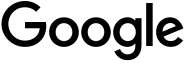

In [6]:
google_url = "https://www.google.com/"

User_Agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36"

waybackpy_url_object = waybackpy.Url(google_url, User_Agent)


# If no argument is passed in get(), it gets the source of the Url used to create the object.
current_google_url_source = waybackpy_url_object.get()
print(current_google_url_source)

In [7]:
google_oldest_archive_source = waybackpy_url_object.get(waybackpy_url_object.oldest())
print(google_oldest_archive_source)

<script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>
<script type="text/javascript">window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app102.us.archive.org';v.server_ms=714;archive_analytics.send_pageview({});});</script><script type="text/javascript" src="/_static/js/playback.bundle.js?v=SOX25l-I" charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/wombat.js?v=cRqOKCOw" charset="utf-8"></script>
<script type="text/javascript">
  __wm.init("https://web.archive.org/web");
  __wm.wombat("http://google.com:80/","19981111184551","https://web.archive.org/","web","/_static/",
	      "910809951");
</script>
<link rel="stylesheet" type="text/css" href="/_static/css/banner-styles.css?v=bsmaklHF" />
<link rel="stylesheet" type="text/css" href="/_static/css/iconochive.css?v=qtvMKcIJ" />
<!-- End Wayback Rewrite JS Include -->
<!-- BEGIN WAYBACK TOOLBAR INSERT -->
<st

In [41]:
URL = "http://mixi.guru/SSR_frontend/accountGet/SSR_index.php"
UA = "Mozilla/5.0 (iPad; CPU OS 8_1_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12B435 Safari/600.1.4"

waybackpy_url_object = waybackpy.Url(url=URL, user_agent=UA)

archive_count = waybackpy_url_object.total_archives()

print(archive_count) # total_archives() returns an int

0


In [9]:
!pip install python-requests


ERROR: Could not find a version that satisfies the requirement python-requests (from versions: none)
ERROR: No matching distribution found for python-requests


In [10]:
!pip install python-requests

ERROR: Could not find a version that satisfies the requirement python-requests (from versions: none)
ERROR: No matching distribution found for python-requests


In [11]:
import python-requests

SyntaxError: invalid syntax (<ipython-input-11-b32ccd17c56b>, line 1)

In [12]:

!pip install requests 

In [40]:


URL = "http://mixi.guru/SSR_frontend/accountGet/SSR_index.php"
#UA = "Mozilla/5.0 (iPad; CPU OS 8_1_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12B435 Safari/600.1.4"
UA = "Mozilla/5.0 (Windows NT 5.1; rv:40.0) Gecko/20100101 Firefox/40.0"
waybackpy_url_object = waybackpy.Url(url=URL, user_agent=UA)
known_urls = waybackpy_url_object.known_urls(alive=False, subdomain=True) # alive and subdomain are optional.
print(known_urls) # known_urls() returns list of URLs

[]


In [44]:
url = "http://email302.com"
params = {
     'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',
}

try:
    response = requests.get(url)
    for h in response.history:
        print(h.url)
    print(response.url)
    print(len(response.history))
except (
    requests.ConnectionError,
    requests.exceptions.ReadTimeout,
    requests.exceptions.Timeout,
    requests.exceptions.ConnectTimeout,
) as e:
    #print(response.status_code)
    #statuscode = 0
    print(e)

http://email302.com/
http://postageapp.com/
https://postageapp.com/
2


In [38]:

url = "http://mixi.guru/SSR_frontend/accountGet/SSR_index.php"
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:39.0) Gecko/20100101 Firefox/39.0"

waybackpy_url_obj = waybackpy.Url(url, user_agent)
json_dict = waybackpy_url_obj.JSON
print(json_dict)

{'url': 'http://mixi.guru/SSR_frontend/accountGet/SSR_index.php', 'archived_snapshots': {}}


In [1]:
%%time
import waybackpy

URL = "www.budgetbots.com"

UA = "Mozilla/5.0 (Pad; CPU OS 8_1_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12B435 Safari/600.1.4"

waybackpy_url_object = waybackpy.Url(url=URL, user_agent=UA)
known_urls = waybackpy_url_object.known_urls(alive=True, subdomain=False) # alive and subdomain are optional.
print(known_urls) # known_urls() returns list of URLs
print(len(known_urls))


['http://budgetbots.com:80/', 'http://www.budgetbots.com:80/cache/_cachetfm0ORBOYkOKX.php', 'http://www.budgetbots.com:80/cache/testmail.php', 'http://budgetbots.com/favicon.ico', 'http://budgetbots.com:80/robots.txt', 'http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com', 'http://www.budgetbots.com/ss.php/Server%20update/index.php?email=darlenefawcett@prepaidlegal.com']
7
Wall time: 2.56 s


# 

# experiment with CNN/RNN

In [94]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108253 sha256=1484d0cf939865f9950a6c6333dab434b4fa086b66fe26a675a5c20a857921b1
  Stored in directory: c:\users\mprit\appdata\local\pip\cache\wheels\8c\f9\f4\4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [96]:
!pip install keras

In [98]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=6b72d8c341530c69b528976246d4c202b5c2add89a3e08f951436c9da473f83a
  Stored in directory: c:\users\mprit\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [99]:

from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

In [111]:
tweeter_labeled_data = pd.read_csv("covid_data_merged_0_1_new.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 95: invalid start byte

In [107]:
temp_data = xlrd.open_workbook(r'covid_data_merged_0_1.xlsx')
sheets_name1 = wb1.sheet_names();
ws1 = wb1.sheet_by_index(0)
labeled_tweets = ws1.col_values(0)

In [108]:
len(labeled_tweets)

314